You are hired by City of Houston to analyze presence of E.coli bacteria in the city’s waterways. You are asked to preform data analysis to accomplish three specific goals: 
1. Compute average amount of E.coli per year in Houston waterways. Plot a bar graph in which x-axis is years (2013-2016) and y-axis is E.coli amount.
2. Compute average amount of E.coli per month in Houston waterways. Plot a bar graph in which x-axis is months (Jan-Dec) and y-axis is E.coli amount. Each month is aggregated over the years.
3. Show correlations between E.coli and chemical factors such as water PH level, dissolved oxygen, specific conductance, etc.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

## Read the data

In [2]:
df = pd.read_excel("Ecoli Data.xlsx")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3565 entries, 0 to 3564
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Sample ID                 3565 non-null   int64         
 1   Station ID                3565 non-null   int64         
 2   Date Collected            3565 non-null   datetime64[ns]
 3   Water Temp                3554 non-null   float64       
 4   Flow Stream               557 non-null    float64       
 5   Transparency              3540 non-null   float64       
 6   Specific Conductance      3550 non-null   float64       
 7   Dissolved Oxygen          3504 non-null   float64       
 8   PH                        3525 non-null   float64       
 9   Salinity                  408 non-null    float64       
 10  Residue                   3552 non-null   float64       
 11  Ammonia Nitrogen          3553 non-null   float64       
 12  Nitrate Nitrogen    

## Compute the average amount of E.coli per year and plot a bar chart with x-axis as year and y-axis as E.coli amount.

<IPython.core.display.Javascript object>


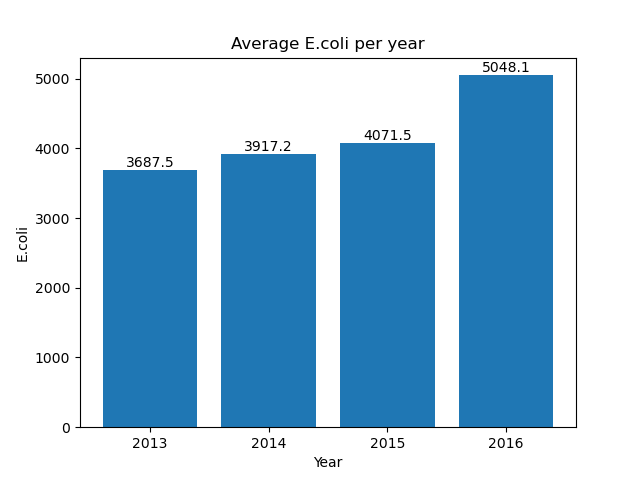

In [3]:
years = range(2013, 2017)
E_coli_year = []
for i in years:
    E_coli_year.append(round(df[df["Date Collected"].dt.year == i]["E.coli"].mean(), 1))

plt.bar(years, E_coli_year, tick_label = years)
plt.xlabel("Year")
plt.ylabel("E.coli")
plt.title("Average E.coli per year")
for i in range(len(years)):
    plt.text(years[i], E_coli_year[i] + 50, str(E_coli_year[i]), horizontalalignment = 'center')
plt.show()

In [4]:
plt.close()

## Compute the average amount of E.coli per month and plot a bar chart with x-axis as month and y-axis as E.coli amount.

In [5]:
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
E_coli_month = []
for i in range(len(months)):
    coli_mean = round(df[df["Date Collected"].dt.month == i + 1]["E.coli"].mean(), 1)
    if (i == 8) | (i == 11): # Since there is no data for September and December, we assume that the average is 0.
        coli_mean = 0
    E_coli_month.append(coli_mean)

plt.bar(months, E_coli_month, tick_label = months)
plt.xlabel("Month")
plt.ylabel("E.coli")
plt.title("Average E.coli per month")
for i in range(len(months)):
    plt.text(i, E_coli_month[i] + 50, str(E_coli_month[i]), horizontalalignment = 'center')
plt.show()

<IPython.core.display.Javascript object>

In [6]:
plt.close()

## Compute the corelation 

In [7]:
selected_col = ["E.coli", "Specific Conductance", "Dissolved Oxygen", "PH", "Salinity", "Ammonia Nitrogen", "Nitrogen",
                "Phosphorous", "Chloride", "Sulfate"]
df[selected_col].corr().style.background_gradient(cmap = "coolwarm").set_precision(2)

,E.coli,Specific Conductance,Dissolved Oxygen,PH,Salinity,Ammonia Nitrogen,Nitrogen,Phosphorous,Chloride,Sulfate
E.coli,1.00,-0.09,-0.11,-0.06,0.16,0.27,0.21,-0.06,-0.12,-0.08
Specific Conductance,-0.09,1.00,-0.02,0.02,0.92,0.05,0.02,0.10,0.92,0.88
Dissolved Oxygen,-0.11,-0.02,1.00,0.68,0.01,-0.07,-0.06,0.09,-0.02,0.05
PH,-0.06,0.02,0.68,1.00,-0.02,-0.04,0.02,0.14,0.01,0.10
Salinity,0.16,0.92,0.01,-0.02,1.00,0.08,-0.07,-0.01,0.84,0.83
Ammonia Nitrogen,0.27,0.05,-0.07,-0.04,0.08,1.00,0.08,0.15,0.01,0.01
Nitrogen,0.21,0.02,-0.06,0.02,-0.07,0.08,1.00,0.11,0.03,0.02
Phosphorous,-0.06,0.10,0.09,0.14,-0.01,0.15,0.11,1.00,0.06,0.09
Chloride,-0.12,0.92,-0.02,0.01,0.84,0.01,0.03,0.06,1.00,0.87
Sulfate,-0.08,0.88,0.05,0.10,0.83,0.01,0.02,0.09,0.87,1.00
